In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np
from data import photometry_data, radio_data, bran_disc, t_neutrino, xray_data, t_peak_mjd, gamma_data, gamma_deintegrate
from astropy import constants as const
from flux_utils import flux_conversion, convert_radio, colors, bands
from plots import big_fontsize, fig_width
from astropy.time import Time
print(photometry_data[photometry_data["band"] == "UVW2"])
print(149.54360 + t_peak_mjd.mjd)

    #day_since_peak  band   flux_Jy       nu_rest           lum       err_lum  \
0          15.54514  UVW2  0.000522  1.569084e+15  9.479170e+43  2.619191e+42   
1          19.23147  UVW2  0.000472  1.569084e+15  8.565847e+43  4.733662e+42   
2          22.20333  UVW2  0.000426  1.569084e+15  7.740523e+43  3.564643e+42   
3          25.16893  UVW2  0.000415  1.569084e+15  7.529572e+43  3.467496e+42   
4          28.24098  UVW2  0.000418  1.569084e+15  7.599243e+43  3.499581e+42   
5          28.33259  UVW2  0.000438  1.569084e+15  7.957384e+43  4.397413e+42   
6          30.66201  UVW2  0.000396  1.569084e+15  7.190686e+43  3.311433e+42   
7          30.85397  UVW2  0.000389  1.569084e+15  7.059441e+43  3.250993e+42   
8          34.23455  UVW2  0.000378  1.569084e+15  6.867052e+43  2.529915e+42   
9          36.69446  UVW2  0.000364  1.569084e+15  6.618664e+43  2.438406e+42   
10         39.53623  UVW2  0.000358  1.569084e+15  6.497859e+43  2.393900e+42   
11         42.74070  UVW2  0

<Figure size 432x288 with 0 Axes>

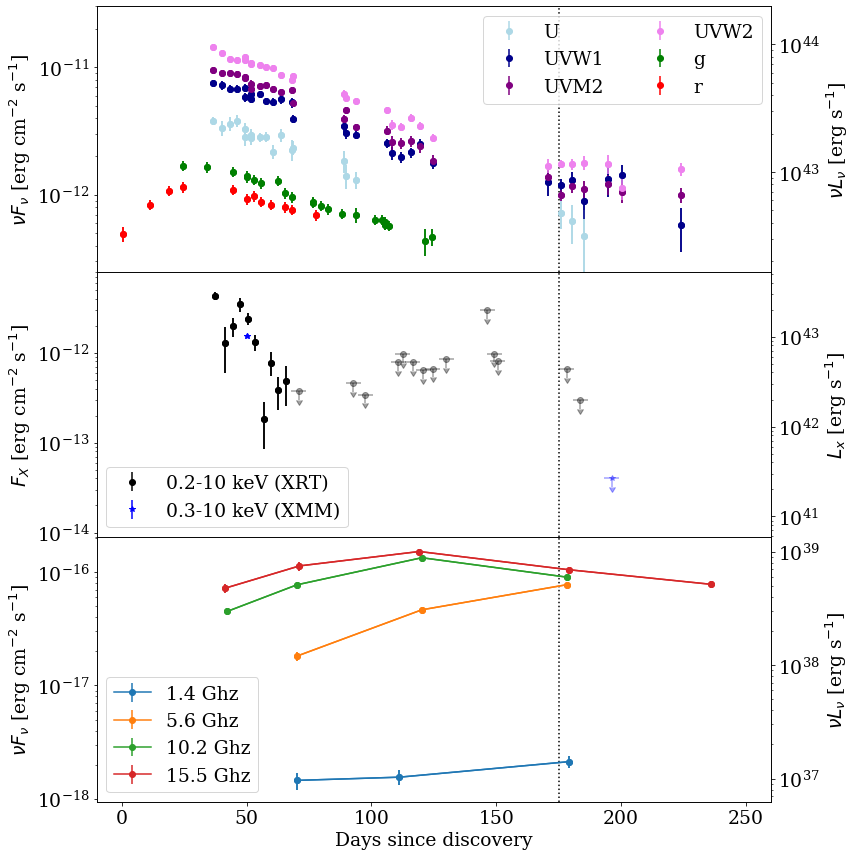

In [16]:
times = []
delta_lum = []
            
plt.tight_layout()

plt.figure(figsize=(fig_width * 2., fig_width * 2.))

ax1 = plt.subplot(311)
ax1b = ax1.twinx()

# Plot luminosity

t_offset = bran_disc.mjd - t_peak_mjd.mjd

for band in bands:
    if band in bands:
        c = colors[band]
        data = photometry_data[photometry_data["band"] == band]
        data = data[data["lum"] > 0.]
        wl = bands[band].to("m")
        f = (const.c / wl).to("GHz")
        flux = flux_conversion * data["lum"]
        
        for x in ["g", "r"]:
            if x in band:
                band = x
        
        ax1b.errorbar(data["#day_since_peak"] - t_offset, data["lum"], yerr=data["err_lum"], color=c,  fmt='o', label=band)
        ax1.errorbar(data["#day_since_peak"] - t_offset, flux, yerr=flux_conversion *data["err_lum"], color=c,  fmt='o', label=band)

ax1.set_ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax1b.set_ylabel(r"$\nu L_{\nu}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax1.legend(fontsize=big_fontsize, ncol=2, loc="upper right")
y_low = 2.5*10**-13
y_up = 3.*10**-11
ax1.set_ylim(y_low, y_up)
ax1b.set_ylim(y_low/flux_conversion, y_up/flux_conversion)
ax1.set_yscale("log")
ax1b.set_yscale("log")
# ax1b.set_ylim(2.*10**-11/flux_conversion, 2.*10**-9/flux_conversion)

ax1.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax1.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax1b.tick_params(axis='both', which='major', labelsize=big_fontsize)

ax2 = plt.subplot(312, sharex=ax1)
ax2b = ax2.twinx()

for i, base_label in enumerate(["0.2-10 keV (XRT)", "0.3-10 keV (XMM)"]):
    for j, ul in enumerate([False, True]):
        
        mask = np.logical_and(
            xray_data["instrument"] == ["XRT", "XMM"][i],
            xray_data["UL"] == ul
        )
        
        marker = ["o", "*"][i]
        
        col = ["k", "blue"][i]
        alpha = [1., 0.2][j]
        
        data = xray_data[mask]
        if not ul:
            label = base_label
            yerr = data["flux_err"]
            xerr = None
        else:
            label = None
            yerr = 0.2*data["flux"]
            xerr = 3.
            
        ax2.errorbar(data["MJD"]-bran_disc.mjd, data["flux"], yerr=yerr, xerr=xerr,  fmt=marker, label=label, color=col, uplims=ul, alpha=alpha)
        ax2b.errorbar(data["MJD"]-bran_disc.mjd, data["flux"]/flux_conversion, yerr=yerr/flux_conversion, xerr=xerr, fmt=marker, color=col, uplims=ul, alpha=alpha)
# ax2.errorbar(xray_ul_data["#MJD"]-bran_disc.mjd, xray_ul_data["flux"], yerr=0.2*xray_ul_data["flux"], xerr=1., uplims=True, fmt=' ', color="k")
# ax3b.errorbar(xray_data["#MJD"]-t_peak_mjd.mjd, 10.**xray_data["log_lum"], yerr=10.**xray_data["log_lum_err"], label="0.2-10 keV",  fmt='o',)

gx = 0.5*(gamma_data["MJD_start"] + gamma_data["MJD_stop"]) - bran_disc.mjd
xerr = 0.5*(gamma_data["MJD_stop"] - gamma_data["MJD_start"])
# print(xerr)
# ax1.errorbar(gx, gamma_data["UL(95)"], xerr=xerr, yerr=0.5*gamma_data["UL(95)"], uplims=True, fmt=' ', label="0.1-800 GeV")
# ax1b.errorbar(gx, gamma_data["UL(95)"]/flux_conversion, xerr=xerr, yerr=0.5*gamma_data["UL(95)"], uplims=True, fmt=' ', label="0.1-800 GeV")


ax2.set_ylabel(r"$F_{X}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax2b.set_ylabel(r"$L_{x}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax2.legend(fontsize=big_fontsize, loc="lower left")
ax2.set_yscale("log")
ax2b.set_yscale("log")
ax2.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax2.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax2b.tick_params(axis='both', which='major', labelsize=big_fontsize)

ymax = 8 * 10**-12
ymin = 0.9 * 10**-14

ax2.set_ylim(ymin, ymax)
ax2b.set_ylim(ymin/flux_conversion, ymax/flux_conversion)

ax3 = plt.subplot(313, sharex=ax1)
ax3b = ax3.twinx()

for frequency in [1.4, 5.6, 10.2, 15.5]:
    data = radio_data[abs(radio_data["frequency"] - frequency) < 0.5]
    data = data.sort_values("mjd")
    ax3.errorbar(data["mjd"]- bran_disc.mjd, convert_radio(data["flux"], frequency),  yerr=convert_radio(data["flux_err"], frequency), marker="o", label="{0} Ghz".format(frequency))
    ax3b.errorbar(data["mjd"]- bran_disc.mjd, convert_radio(data["flux"], frequency)/flux_conversion,  yerr=convert_radio(data["flux_err"], frequency)/flux_conversion, marker="o", label="{0} Ghz".format(frequency))

ax3.set_ylabel(r"$\nu F_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]", fontsize=big_fontsize)
ax3b.set_ylabel(r"$\nu L_{\nu}$ [erg s$^{-1}$]", fontsize=big_fontsize)
ax3.legend(fontsize=big_fontsize)
ax3.set_yscale("log")
ax3b.set_yscale("log")
ax3.axvline(t_neutrino.mjd - bran_disc.mjd, color="k", linestyle=":", label="IC191001A")
ax3.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax3b.tick_params(axis='both', which='major', labelsize=big_fontsize)
ax3.set_xlim(-10., 260.)

# ax2 = plt.subplot2grid((4, 1), (3, 0), colspan=3, rowspan=1, sharex=ax1)
# ax2.scatter(index_times, photon_index)
# ax2.set_ylabel(r"$\frac{d(Log(\nu L_{\nu}))}{d(Log(f))}$", fontsize=12)
# plt.axhline(2.0, color="k", linestyle=":")
ax3.set_xlabel("Days since discovery", fontsize=big_fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=.0)
plt.savefig("plots/lightcurve.pdf")